<a href="https://colab.research.google.com/github/lyl24/lyl24-ece4960/blob/gh-pages/PID_ECE4960FastRobots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook for Designing PID controller

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

'''
ECE 4960: Designing a PID controller
'''

class System:

  def __init__(self, 
               A=[[0, 1],[0,-0.2]],
               B=[0,1], 
               x0=[0, 0], 
               sigma = 0,
               dt=0.005):
    
    self.x=np.array(x0)
    self.t=0
    self.dt=dt

    self.sigma = sigma

    self.A = np.array(A)
    self.B = np.array(B)
    
    self.x_hist=[x0]
    self.y_hist=[0]    
    self.t_hist=[self.t]
    self.e_hist=[0]

    '''
    Controller parameters
    '''
    self.I=0
    self.dF=0

  def step(self,u):
    self.x =  self.x + self.dt * ( np.dot(self.A,self.x) + u*self.B )
    self.t += self.dt
    self.t_hist.append(self.t)
    self.x_hist.append(tuple(self.x))
    self.y_hist.append(self.x[1]+np.random.normal(scale=self.sigma))    


  def PID(self,setpoint, KP=0, KI=0, KD=0, alpha = 0):
    '''
    1) get error signal
    2) Update integral
    3) Compute d for derivative
    4) Compute and return u
    '''
    e = setpoint - self.y_hist[-1]
    self.e_hist.append(e)

    self.I += e * self.dt
    
    if len(self.e_hist) >= 2:
      d = (self.e_hist[-1] - self.e_hist[-2]) / self.dt  
      self.dF = alpha*d + (1-alpha)*self.dF
    else:
      self.dF = 0

    return  KP*e + KD*self.dF + KI*self.I
    
  def runPID(self, setpoint, KP=0, KI=0, KD=0, Tfinal=10, alpha=0):
    while self.t < Tfinal:
      u=self.PID(setpoint,1.0*KP,1.0*KI,1.0*KD,alpha=alpha)
      self.step(u)



Look at the effect of KD on the output signal and the state in the presence of noise (sigma [0-1]), with and without a LPF (alpha [0 1])


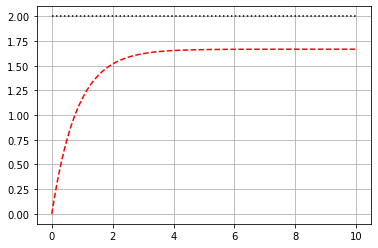

In [ ]:
sys=System(sigma=0)

setpoint= 2
final_time=10

sys.runPID(setpoint,KP=1,KI=0,KD=0, alpha=1,Tfinal=final_time)

#Plot Controller Output
#plt.plot(sys.t_hist,sys.y_hist)
#Plot Actual State
plt.plot(sys.t_hist,tuple(x[1] for x in sys.x_hist),'r--')
#Plot Setpoint
plt.plot([0,final_time],[setpoint,setpoint],'k:')
plt.grid()